<a href="https://colab.research.google.com/github/lavanya1508/Major_project/blob/main/hatefinalcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


In [ ]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import re
import nltk
from nltk.util import pr
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword = set(stopwords.words("english"))

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving twitter_data.csv.csv to twitter_data.csv.csv


In [ ]:
import io
df=pd.read_csv(io.BytesIO(uploaded['twitter_data.csv.csv']))
print(df.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  


In [ ]:
df['text length'] = df['tweet'].apply(len)
print(df.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  text length  
0  !!! RT @mayasolovely: As a woman you shouldn't...          140  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...           85  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...          120  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...           62  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...          137  


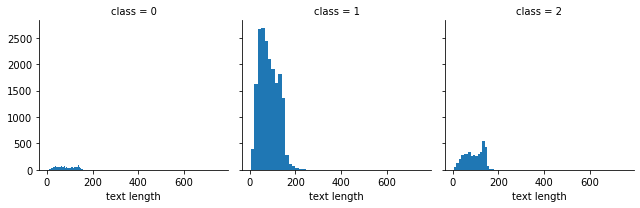

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
graph = sns.FacetGrid(data=df, col='class')
graph.map(plt.hist, 'text length', bins=50)

<Axes: xlabel='class', ylabel='text length'>

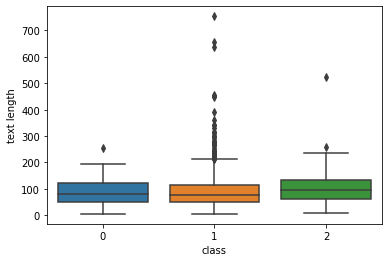

In [ ]:
sns.boxplot(x='class', y='text length', data=df)

<Axes: >

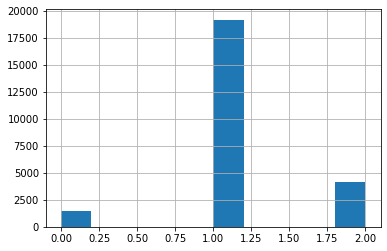

In [ ]:
df['class'].hist()

In [ ]:
df['labels'] = df['class'].map({0:"Hate Speech Detected",1:"Offencive language detected",2:"No hate and  No offensive speech"})
print(df.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  text length  \
0  !!! RT @mayasolovely: As a woman you shouldn't...          140   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...           85   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...          120   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...           62   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...          137   

                             labels  
0  No hate and  No offensive speech  
1       Offencive language detected  
2       Offencive language detec

In [ ]:
df=df[['tweet','labels']]
df.head() 

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No hate and No offensive speech
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offencive language detected
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offencive language detected
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offencive language detected
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offencive language detected


In [ ]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]','',text)
    text = re. sub('https?://\S+|www\.\s+','',text)
    text = re.sub('<.?>+','',text)
    text = re.sub('[%s]'% re.escape (string.punctuation),'',text)
    text = re. sub('\n','',text)
    text = re.sub('\w*\d\w*','',text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)
    text = [stemmer. stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

df ["tweet"] = df ["tweet"].apply(clean)
print(df.head())

                                               tweet  \
0   rt mayasolov woman shouldnt complain clean ho...   
1   rt  boy dat coldtyga dwn bad cuffin dat hoe  ...   
2   rt urkindofbrand dawg rt  ever fuck bitch sta...   
3             rt cganderson vivabas look like tranni   
4   rt shenikarobert shit hear might true might f...   

                             labels  
0  No hate and  No offensive speech  
1       Offencive language detected  
2       Offencive language detected  
3       Offencive language detected  
4       Offencive language detected  


<ipython-input-20-03354fd44628>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df ["tweet"] = df ["tweet"].apply(clean)


In [ ]:
x = np.array(df["tweet"])
y = np.array(df["labels"])

cv = CountVectorizer()
X = cv.fit_transform(x)
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.33, random_state= 42)


In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_preds = clf.predict(X_test)
report = classification_report( y_test, y_preds )
print(report)
acc=accuracy_score(y_test,y_preds)
print("Decision Tree, Accuracy Score:" , acc)

                                  precision    recall  f1-score   support

            Hate Speech Detected       0.36      0.33      0.35       465
No hate and  No offensive speech       0.82      0.82      0.82      1379
     Offencive language detected       0.92      0.93      0.93      6335

                        accuracy                           0.88      8179
                       macro avg       0.70      0.69      0.70      8179
                    weighted avg       0.87      0.88      0.88      8179

Decision Tree, Accuracy Score: 0.8770020784937034


In [ ]:
test_data="I will kill you"
df=cv.transform([test_data]).toarray()
print(clf.predict(df))

['Hate Speech Detected']


In [ ]:
test_data="you are awesome"
df=cv.transform([test_data]).toarray()
print(clf.predict(df))

['No hate and  No offensive speech']


In [ ]:
test_data="You are too bad and I dont like your attitude"
df=cv.transform([test_data]).toarray()
print(clf.predict(df))

['Offencive language detected']
